In [1]:
import torch 
import gpytorch
import numpy as np
from matplotlib import pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('..'))

from pv_plot.plotting import plot_gp, plot_train_test_split
from data import PVDataGenerator, PVDataLoader
from data.utils import *
from models import ApproximateGPBaseModel
from likelihoods.beta import BetaLikelihood_MeanParametrization
from kernels import Kernel

In [13]:
# set seed for reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

# data parameters
DAY_INIT = 20
DAY_MIN = 8
DAY_MAX = 16
N_DAYS = 5
MINUTE_INTERVAL = 5
DAILY_DATA_POINTS = (DAY_MAX - DAY_MIN) * 60 / MINUTE_INTERVAL
N_HOURS_PRED = 8
N_SYSTEMS = 300
RADIUS = 0.35
COORDS = (55, -1.5)
POLY_COORDS = ((50, -6), (50.5, 1.9), (57.6, -5.5), (58, 1.9))

==> Loading data
==> Loaded data in: 0 m : 10 sec

==> Loading data
==> Loaded data in: 0 m : 0 sec

Predicting 2 hours ahead from 13:00


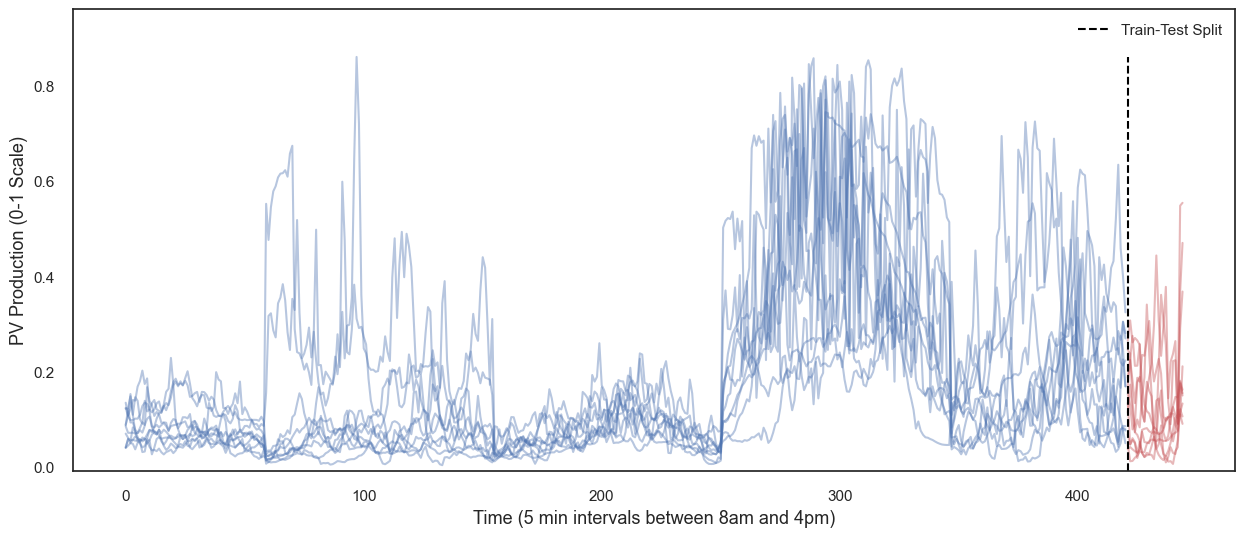

In [22]:
generator = PVDataGenerator(n_days=N_DAYS,
                    day_init=DAY_INIT,
                    n_systems=N_SYSTEMS,
                    radius=RADIUS,
                    coords=POLY_COORDS,
                    minute_interval=MINUTE_INTERVAL,
                    day_min=DAY_MIN,
                    day_max=DAY_MAX,
                    folder_name='pv_data',
                    file_name_pv='pv_data_clean.csv',
                    file_name_location='location_data_clean.csv',
                    distance_method='poly',
                    drop_nan=True)
# randomly select 10 systems
X, y = generator.get_time_series()
idx = np.random.choice(y.size(-1) - 1, size=10, replace=False)
y = y[:, idx]

x_train, y_train, x_test, y_test = train_test_split(X, y, hour=13)

plt.rcParams['font.family'] = 'Arial'
plot_train_test_split(y_train, y_test)


## Parameters from Hyperparameter Optimization
* alpha_matern      : 8
* beta_matern       : 14
* alpha_periodic    : 8
* beta_periodic     : 10 
* alpha_periodic_P  : 4 
* beta_periodic_P   : 5 
* mean_type         : constant 
* scale             : 1 
* correcting_scale  : 2


In [23]:
from gpytorch.means import ZeroMean
from gpytorch.constraints import Interval, Positive

mean = ZeroMean()

kernel = Kernel()
matern_base = kernel.get_matern(lengthscale_constraint=Positive())
matern_quasi = kernel.get_matern(lengthscale_constraint=Interval(0.3, 1000.0))
periodic_daily = kernel.get_periodic(lengthscale_constraint= Positive())
periodic_hourly = kernel.get_periodic(lengthscale_constraint= Interval(0.1, 1000.0))

kernel = kernel.get_quasi_periodic(matern_base=matern_base, 
                                           matern_quasi=matern_quasi,
                                           periodic_daily=periodic_daily,
                                          periodic_hourly=periodic_hourly)


Iter 40/400 - Loss: -1.002
Iter 80/400 - Loss: -1.127
Iter 120/400 - Loss: -1.167
Iter 160/400 - Loss: -1.181
Iter 200/400 - Loss: -1.188
Iter 240/400 - Loss: -1.191
Iter 280/400 - Loss: -1.193
Iter 320/400 - Loss: -1.195
Iter 360/400 - Loss: -1.197
Iter 400/400 - Loss: -1.198
9.87


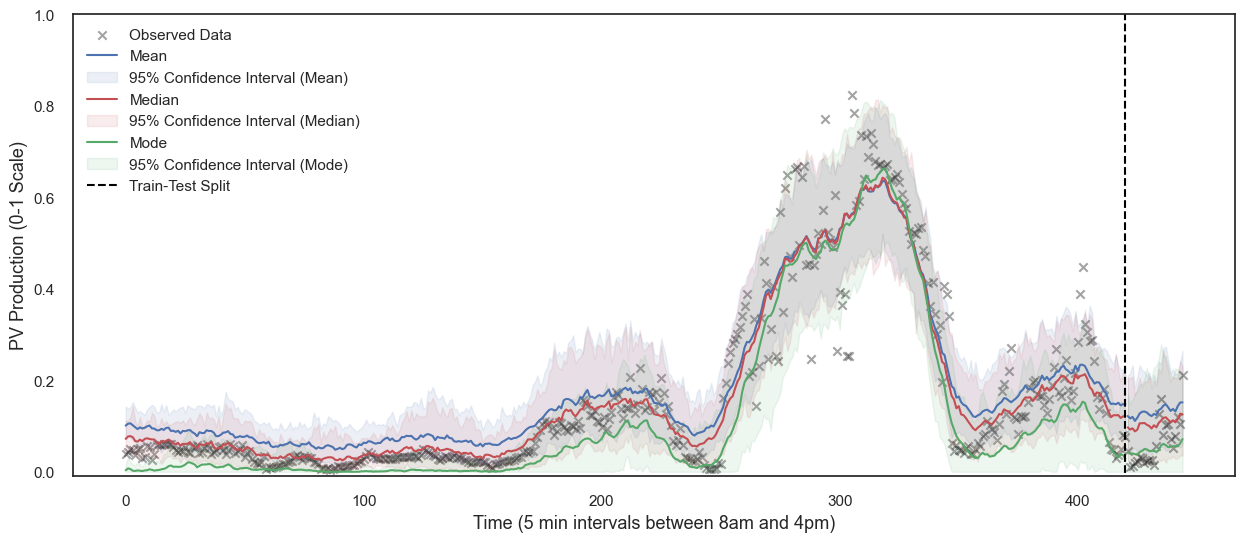

Iter 40/400 - Loss: -0.884
Iter 80/400 - Loss: -0.955
Iter 120/400 - Loss: -0.974
Iter 160/400 - Loss: -0.983
Iter 200/400 - Loss: -0.988
Iter 240/400 - Loss: -0.990
Iter 280/400 - Loss: -0.991
Iter 320/400 - Loss: -0.992
Iter 360/400 - Loss: -0.992
Iter 400/400 - Loss: -0.992
9.99


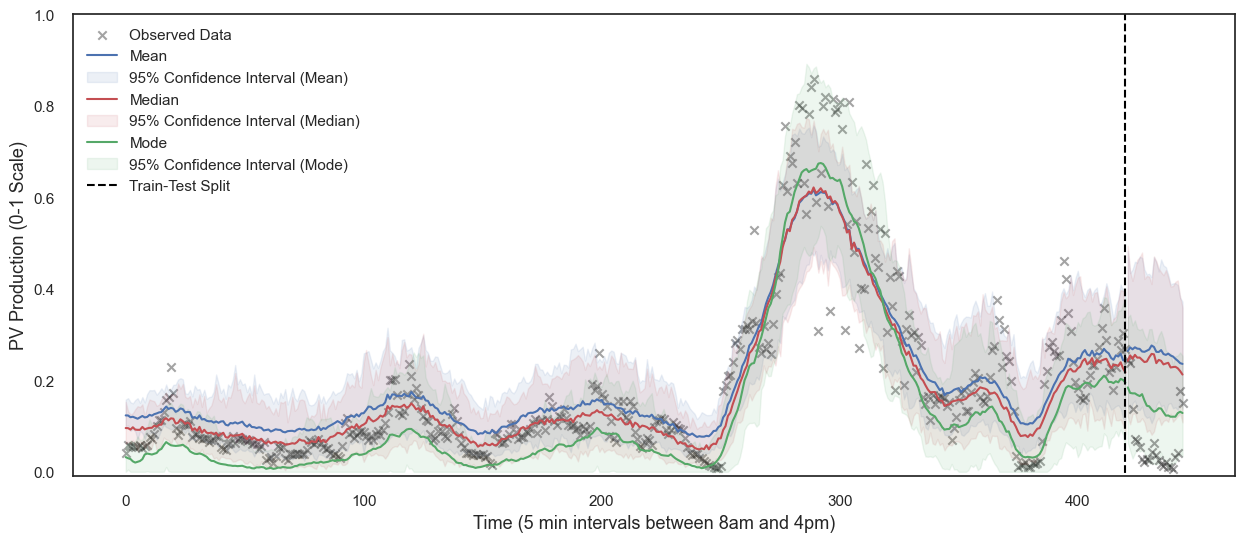

Iter 40/400 - Loss: -1.039
Iter 80/400 - Loss: -1.106
Iter 120/400 - Loss: -1.131
Iter 160/400 - Loss: -1.146
Iter 200/400 - Loss: -1.153
Iter 240/400 - Loss: -1.155
Iter 280/400 - Loss: -1.155
Iter 320/400 - Loss: -1.156
Iter 360/400 - Loss: -1.156
Iter 400/400 - Loss: -1.156
10.00


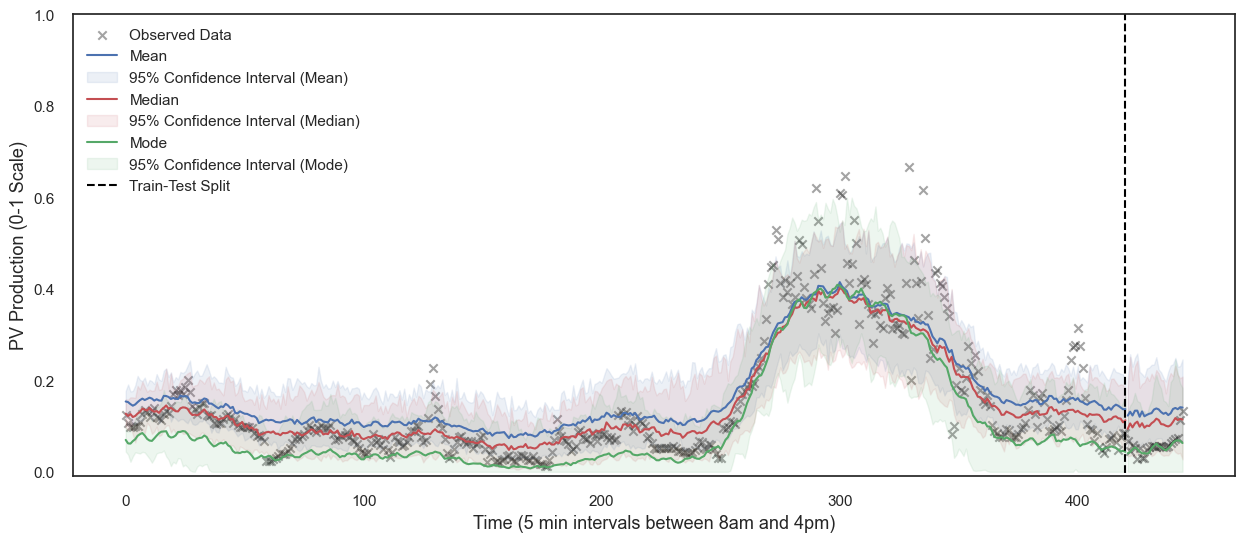

Iter 40/400 - Loss: -1.033
Iter 80/400 - Loss: -1.127
Iter 120/400 - Loss: -1.152
Iter 160/400 - Loss: -1.169
Iter 200/400 - Loss: -1.183
Iter 240/400 - Loss: -1.189
Iter 280/400 - Loss: -1.198
Iter 320/400 - Loss: -1.203
Iter 360/400 - Loss: -1.206
Iter 400/400 - Loss: -1.208
10.00


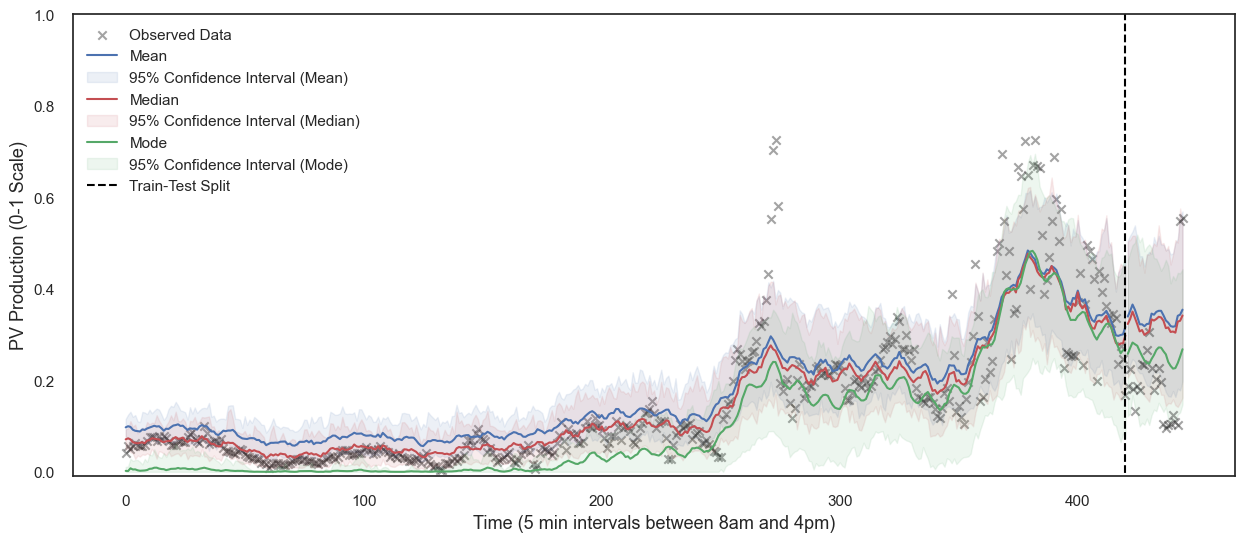

Iter 40/400 - Loss: -1.051
Iter 80/400 - Loss: -1.117
Iter 120/400 - Loss: -1.140
Iter 160/400 - Loss: -1.156
Iter 200/400 - Loss: -1.166
Iter 240/400 - Loss: -1.171
Iter 280/400 - Loss: -1.173
Iter 320/400 - Loss: -1.175
Iter 360/400 - Loss: -1.175
Iter 400/400 - Loss: -1.176
10.00


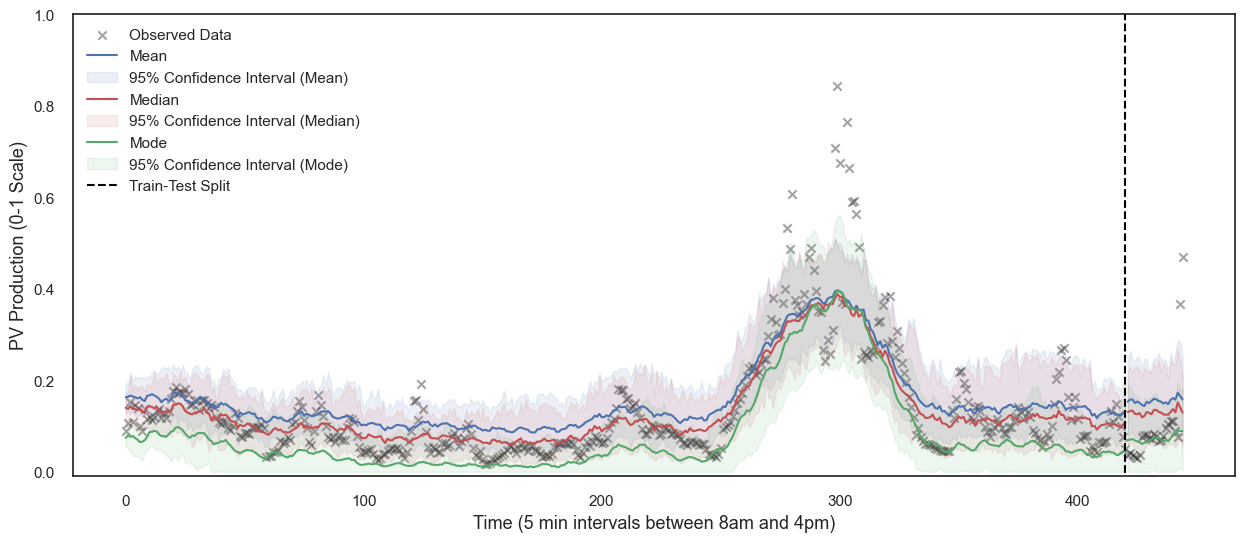

Iter 40/400 - Loss: -1.122
Iter 80/400 - Loss: -1.213
Iter 120/400 - Loss: -1.250
Iter 160/400 - Loss: -1.275
Iter 200/400 - Loss: -1.289
Iter 240/400 - Loss: -1.294
Iter 280/400 - Loss: -1.295
Iter 320/400 - Loss: -1.296
Iter 360/400 - Loss: -1.297
Iter 400/400 - Loss: -1.297
10.00


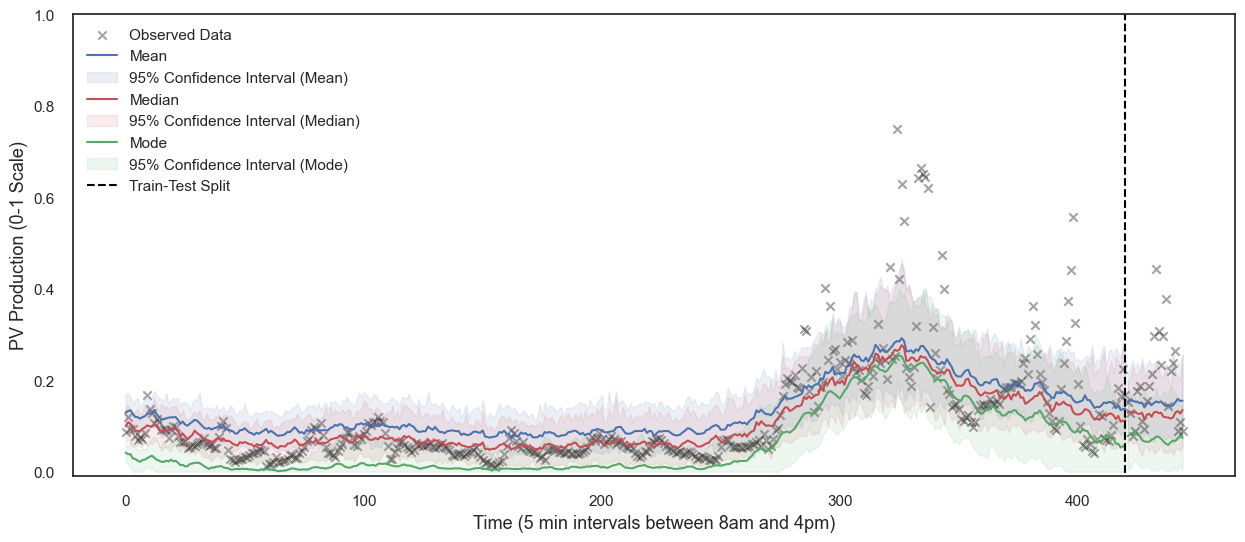

Iter 40/400 - Loss: -0.999
Iter 80/400 - Loss: -1.089
Iter 120/400 - Loss: -1.114
Iter 160/400 - Loss: -1.137
Iter 200/400 - Loss: -1.148
Iter 240/400 - Loss: -1.154
Iter 280/400 - Loss: -1.158
Iter 320/400 - Loss: -1.159
Iter 360/400 - Loss: -1.160
Iter 400/400 - Loss: -1.161
10.00


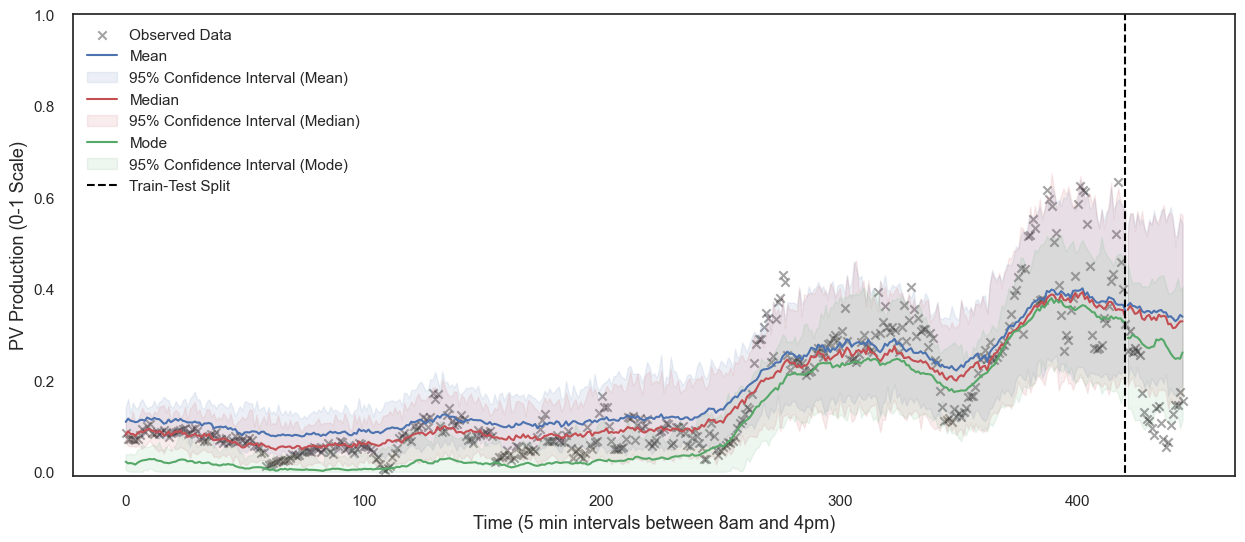

Iter 40/400 - Loss: -0.672
Iter 80/400 - Loss: -0.770
Iter 120/400 - Loss: -0.779
Iter 160/400 - Loss: -0.784
Iter 200/400 - Loss: -0.787
Iter 240/400 - Loss: -0.790
Iter 280/400 - Loss: -0.792
Iter 320/400 - Loss: -0.794
Iter 360/400 - Loss: -0.795
Iter 400/400 - Loss: -0.796
10.00


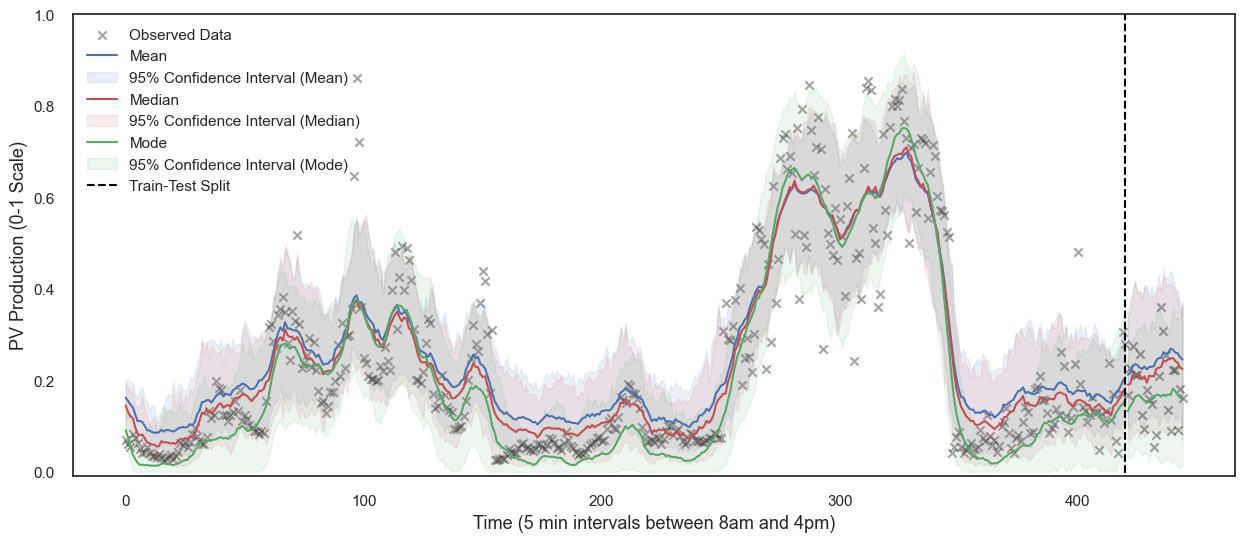

Iter 40/400 - Loss: -0.785
Iter 80/400 - Loss: -0.833
Iter 120/400 - Loss: -0.842
Iter 160/400 - Loss: -0.845
Iter 200/400 - Loss: -0.846
Iter 240/400 - Loss: -0.846
Iter 280/400 - Loss: -0.846
Iter 320/400 - Loss: -0.846
Iter 360/400 - Loss: -0.846
Iter 400/400 - Loss: -0.846
10.00


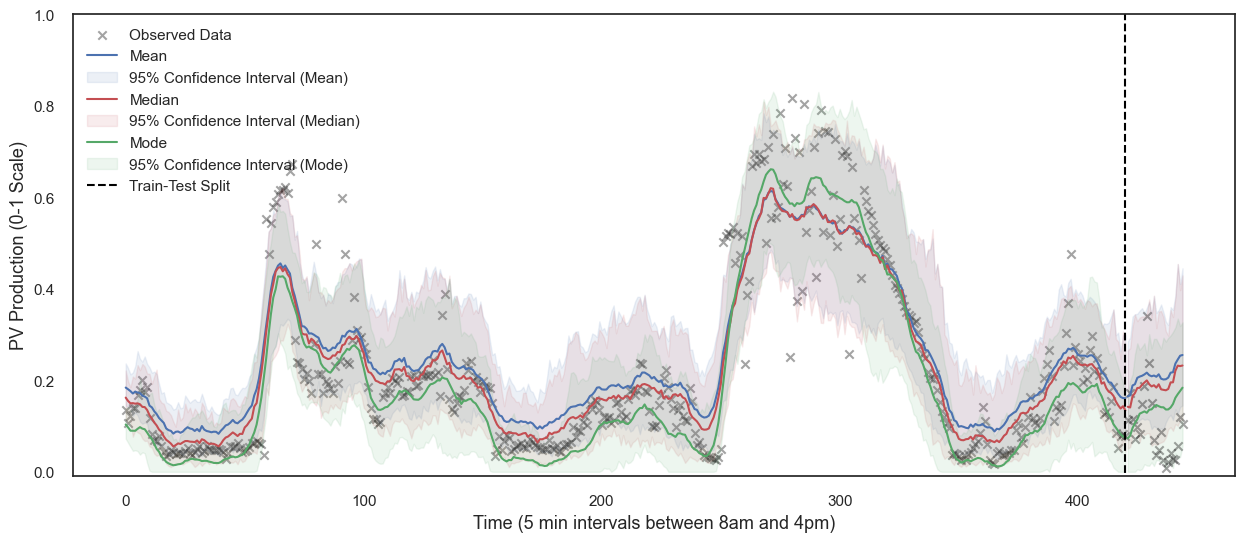

Iter 40/400 - Loss: -1.076
Iter 80/400 - Loss: -1.132
Iter 120/400 - Loss: -1.154
Iter 160/400 - Loss: -1.166
Iter 200/400 - Loss: -1.173
Iter 240/400 - Loss: -1.176
Iter 280/400 - Loss: -1.177
Iter 320/400 - Loss: -1.177
Iter 360/400 - Loss: -1.177
Iter 400/400 - Loss: -1.177
10.00


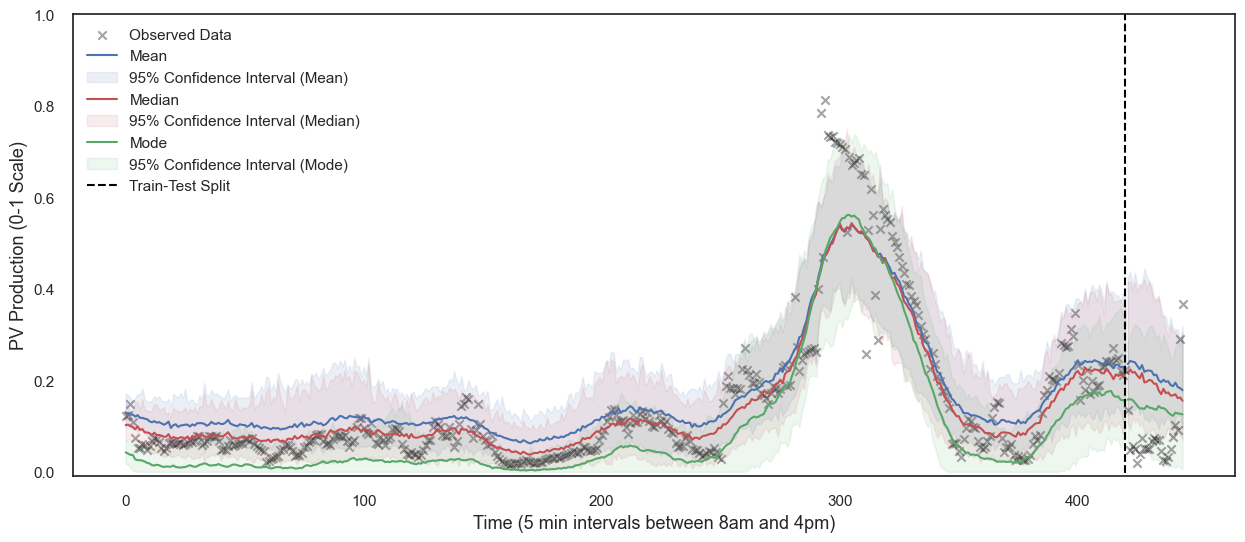

In [25]:
jitter = 1e-3

config = {  'type': 'stochastic',
            'name': 'mean_field',
            'num_inducing_points': x_train.size(0)
            }
inputs ={
    'X' : x_train,
    'config': config,
    'jitter': jitter,
    'likelihood': BetaLikelihood_MeanParametrization(
                        scale=15,
                        scale_upper_bound=10,
                        scale_lower_bound=1),
    'mean_module': mean,
    'covar_module': kernel,
    'learn_inducing_locations': False
}
    
for idx in range(y_train.size(-1)):
    inputs['y'] = y_train[:,idx]
    
    model_beta = ApproximateGPBaseModel(**inputs)
    model_beta.fit(n_iter=400, lr=0.1,  verbose=True)  
    print(f'{model_beta.likelihood.scale.item():.2f}')  

    preds = model_beta.predict(X)
    plot_gp(model_beta, x_train, x_test, y_train[:,idx], y_test[:,idx], pred_type='all')

In [39]:
for name, parameter in model_beta.named_parameters():
    print(name)
    print(parameter.shape)


variational_strategy._variational_distribution.variational_mean
torch.Size([421])
variational_strategy._variational_distribution._variational_stddev
torch.Size([421])
covar_module.kernels.0.kernels.0.kernels.0.raw_outputscale
torch.Size([1])
covar_module.kernels.0.kernels.0.kernels.0.base_kernel.raw_lengthscale
torch.Size([1, 1, 1])
covar_module.kernels.0.kernels.0.kernels.0.base_kernel.raw_period_length
torch.Size([1, 1, 1])
covar_module.kernels.0.kernels.0.kernels.1.raw_outputscale
torch.Size([1])
covar_module.kernels.0.kernels.0.kernels.1.base_kernel.raw_lengthscale
torch.Size([1, 1, 1])
covar_module.kernels.0.kernels.0.kernels.1.base_kernel.raw_period_length
torch.Size([1, 1, 1])
covar_module.kernels.0.kernels.1.raw_outputscale
torch.Size([1])
covar_module.kernels.0.kernels.1.base_kernel.raw_lengthscale
torch.Size([1, 1, 1])
covar_module.kernels.1.raw_outputscale
torch.Size([1])
covar_module.kernels.1.base_kernel.raw_lengthscale
torch.Size([1, 1, 1])
likelihood.raw_scale
torch.Size

In [19]:
x = torch.linspace(0,100, 400)
hours_pred = 2
hourly_points =  60 // MINUTE_INTERVAL
daily_points = (DAY_MAX - DAY_MIN) * hourly_points
n_points = N_DAYS * daily_points
n_pred = hours_pred * hourly_points 

x = torch.linspace(0, 100, n_points + n_pred)
x_train = x[:n_points]
x_test = x[n_points:]

config['num_inducing_points'] = x_train.size(0)
inputs['config'] = config

Iter 20/200 - Loss: -0.337
Iter 40/200 - Loss: -0.353
Iter 60/200 - Loss: -0.357
Iter 80/200 - Loss: -0.358
Iter 100/200 - Loss: -0.359
Iter 120/200 - Loss: -0.359
Iter 140/200 - Loss: -0.360
Iter 160/200 - Loss: -0.360
Iter 180/200 - Loss: -0.360
Iter 200/200 - Loss: -0.360
3.99


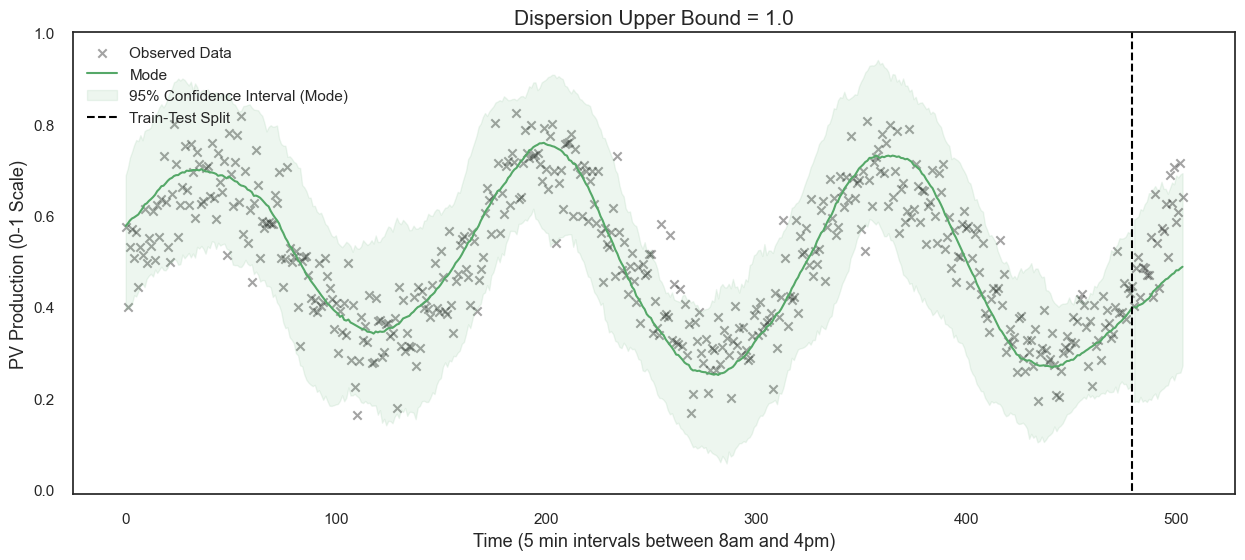

In [20]:
y_train = 0.2*torch.sin(x_train*torch.pi/(2*8)) + 0.07*torch.randn_like(x_train) + 0.5
y_test = 0.2*torch.sin(x_test*torch.pi/(2*8)) + 0.07*torch.randn_like(x_test) + 0.5
inputs['X'] = x_train
inputs['y'] = y_train
inputs['likelihood'] = BetaLikelihood_MeanParametrization(scale=10,
                                                          scale_lower_bound=1,
                                                          scale_upper_bound=4)

model_beta = ApproximateGPBaseModel(**inputs)
model_beta.fit(n_iter=200, lr=0.1,  verbose=True)  
model_beta.likelihood.noise = 0.2
print(f'{model_beta.likelihood.scale.item():.2f}')  

preds = model_beta.predict(x)
title = f'Dispersion Upper Bound = {model_beta.likelihood.upper_bound:.1f}'
plot_gp(model_beta, x_train, x_test, y_train, y_test, pred_type='mode', title=title)


In [34]:
for name, param in model_beta.named_parameters():
    print(name, param.shape)

variational_strategy._variational_distribution.variational_mean torch.Size([672])
variational_strategy._variational_distribution._variational_stddev torch.Size([672])
mean_module.raw_constant torch.Size([])
covar_module.kernels.0.kernels.0.raw_outputscale torch.Size([1])
covar_module.kernels.0.kernels.0.base_kernel.raw_lengthscale torch.Size([1, 1, 1])
covar_module.kernels.0.kernels.1.raw_outputscale torch.Size([1])
covar_module.kernels.0.kernels.1.base_kernel.raw_lengthscale torch.Size([1, 1, 1])
covar_module.kernels.0.kernels.1.base_kernel.raw_period_length torch.Size([1, 1, 1])
likelihood.raw_scale torch.Size([1])
likelihood.correcting_scale torch.Size([])
